In [1]:
import os
from skimage import io
import cv2
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import seaborn as sb
from sklearn.metrics.pairwise import euclidean_distances
import sys
sys.path.insert(0,'/content/drive/MyDrive/ANN/HW03')
import som_module as sm

In [2]:
def create_data_set(): 
    images_path = [ os.path.join("/content/drive/MyDrive/ANN/Datasets/yalefaces/", item)  for item in  os.listdir(
        "/content/drive/MyDrive/ANN/Datasets/yalefaces") ]
    image_data = []
    image_labels = []
    num = 0
    for i,im_path in enumerate(images_path):
        im = io.imread(im_path)
        image_data.append(np.array(np.ravel(im), dtype='uint8'))
        label = os.path.split(im_path)[1].split(".")[1]
        image_labels.append(label)
    enc = LabelEncoder()
    image_labels = enc.fit_transform(np.array(image_labels))
    train_data, train_label = image_data[:9*11], image_labels[:9*11]
    val_data, val_label = image_data[9*11:13*11], image_labels[9*11:13*11]
    test_data, test_label = image_data[13*11:], image_labels[13*11:]
    
    print('Number data in each group: ', len(train_data), len(val_data), len(test_data))
    
    return np.array(train_data), np.array(train_label), np.array(val_data), np.array(val_label), np.array(test_data), np.array(test_label)

Number data in each group:  99 44 22
iter:  0 changes in weights: 352424.6029572759 purity: 0.45454545454545453
iter:  10 changes in weights: 75645.89714778806 purity: 0.6565656565656566
iter:  20 changes in weights: 62181.16683622475 purity: 0.6565656565656566
iter:  30 changes in weights: 48969.667021896596 purity: 0.696969696969697
iter:  40 changes in weights: 36002.87364893574 purity: 0.7171717171717171
iter:  50 changes in weights: 18135.59943891592 purity: 0.7575757575757576
iter:  60 changes in weights: 7527.418247972612 purity: 0.7878787878787878
iter:  70 changes in weights: 4168.945111977284 purity: 0.797979797979798
iter:  80 changes in weights: 3232.952573925521 purity: 0.797979797979798
iter:  90 changes in weights: 2257.513048084371 purity: 0.797979797979798


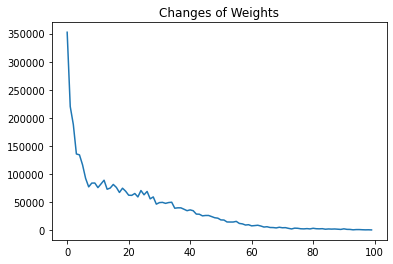

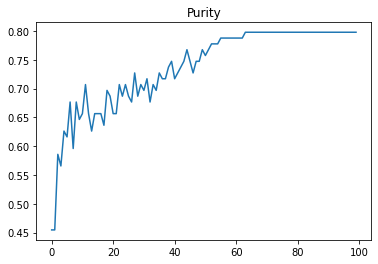

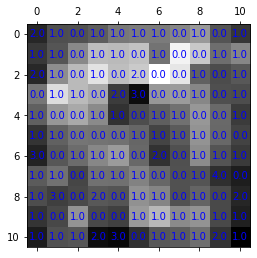

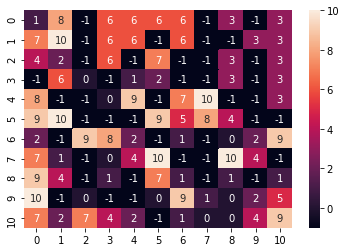

In [3]:
if __name__ == "__main__":
    train_data, train_label, val_data, val_label, test_data, test_label = create_data_set()
    som_net = sm.SOM(map_size=[11,11,train_data.shape[1]], lr=1)
    changes, puritylist = som_net.train(train_data, train_label, T=100)
    plt.title('Changes of Weights')
    plt.plot(changes)
    plt.show()
    plt.title('Purity')
    plt.plot(puritylist)
    plt.show()
    som_net.visualize_umat()
    som_net.visualize_som(train_data, train_label)
    train_features = []
    for x in train_data:
      train_features.append(som_net.extract_features(x).ravel())
    train_features = np.array(train_features)
    data = pd.DataFrame(np.append(train_features, np.expand_dims(train_label, axis=1), axis=1))
    data.to_csv('/content/drive/MyDrive/ANN/Datasets/yale_train.csv', header=False, index = False)
    val_features = []
    for x in val_data:
      val_features.append(som_net.extract_features(x).ravel())
    val_features = np.array(val_features)
    data = pd.DataFrame(np.append(val_features, np.expand_dims(val_label, axis=1), axis=1))
    data.to_csv('/content/drive/MyDrive/ANN/Datasets/yale_val.csv', header=False, index = False)
    test_features = []
    for x in test_data:
      test_features.append(som_net.extract_features(x).ravel())
    test_features = np.array(test_features)
    data = pd.DataFrame(np.append(test_features, np.expand_dims(test_label, axis=1), axis=1))
    data.to_csv('/content/drive/MyDrive/ANN/Datasets/yale_test.csv', header=False, index = False)
    
    plt.imshow(train_features[0].reshape(map_size[0], mapsize[1]))
    plt.show()